# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analyzing">Analyzing and Visualizing Data</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import requests
import os

# Load twitter archive data
df_archive= pd.read_csv('twitter-archive-enhanced-1.csv')
# Take a sneak peek
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Requests library is used to download the "tweet image prediction" (image_predictions.tsv) programmatically

In [2]:
# download images programmatically
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)


# Access content and write to file
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [3]:
# A sneek peek of the data
prediction_images= pd.read_csv('image-predictions.tsv', sep='\t')
prediction_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Gathering additional data via the Twitter API (tweet_json.txt)

> **Note to Reviewer: this student had mobile verification issues so the following Twitter API code was sent to this student from a Udacity instructor.**

In [ ]:
# Import necessary libraries and modules
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [5]:
# load tweet-json.txt as a pandas dataframe
tweet_json= pd.read_json('tweet-json.txt', lines=True)
tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id='assessing'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
#pd.set_option('display.max_rows', None)

In [7]:
# Do a visual assessment of the "df_archive data"
pd.set_option('display.max_rows', 500)
df_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_archive.loc[:,['name', 'doggo', 'floofer', 'pupper', 'puppo']]

,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None
...,...,...,...,...,...
2351,None,None,None,None,None
2352,a,None,None,None,None
2353,a,None,None,None,None
2354,a,None,None,None,None


In [9]:
df_archive.rating_denominator.isnull().sum()

0

In [10]:
df_archive.duplicated().sum()

0

In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

<AxesSubplot:>

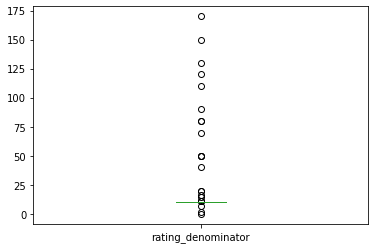

In [13]:
# Create a box plot to see distribution of rating denominators
plt.subplot()
df_archive['rating_denominator'].plot(kind='box')

In [14]:
# Generate a value count for rating denominator
df_archive['rating_denominator'].value_counts().sort_values(ascending=False)

10     2333
50        3
11        3
20        2
80        2
90        1
120       1
16        1
110       1
130       1
40        1
170       1
0         1
150       1
15        1
7         1
70        1
2         1
Name: rating_denominator, dtype: int64

*It has been found that a large proportion of the rating denominators have a value of "10"*

In [15]:
# Filter dataset based on rating_numerators not equal to 10
df_archive[df_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [16]:
# Filter table based on tweet indexes and and specific columns with rating denominator not equal to 10, to conduct visual assessment of the data
df_archive.iloc[[313,342,433,516,784,902,1068,1120,1165,1202,1228,1254,1274,1351,1433,1598,1634,1635,1662,1663,1779,1843,2335], np.r_[5,10:17]]

,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,None,None,None,None
342,@docmisterio account started on 11/15/15,11,15,None,None,None,None,None
433,The floofs have been released I repeat the flo...,84,70,None,None,None,None,None
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None
784,"RT @dog_rates: After so many requests, this is...",9,11,None,None,None,None,None
902,Why does this never happen at my front door......,165,150,None,None,None,None,None
1068,"After so many requests, this is Bretagne. She ...",9,11,None,None,None,None,None
1120,Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None,None,None,None
1202,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,None,None,None


In [17]:
# Further investigation into the actual texts of these tweets to confirm the anomaly
pd.set_option('display.max_colwidth', None)
list(df_archive.iloc[[313,342,433,516,784,902,1068,1120,1165,1202,1228,1254,1274], 5])

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 '@docmisterio account started on 11/15/15',
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This

*Some ratings are really not ratings, while some others are misrepresented*

In [18]:
# Check for number of missing values in column: "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp"
missing1=df_archive['retweeted_status_id'].isnull().sum()
missing2=df_archive['retweeted_status_user_id'].isnull().sum()
missing3=df_archive['retweeted_status_timestamp'].isnull().sum()
missing4=df_archive['in_reply_to_status_id'].isnull().sum()
missing5=df_archive['in_reply_to_user_id'].isnull().sum()

# Print number of missing values for each column
print(missing1)
print(missing2)
print(missing3)
print(missing4)
print(missing5)

2175
2175
2175
2278
2278


----

In [19]:
# Take a sneak peek at the images prescription data
prediction_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
# This code will gather all the unique values in columns p1,p2, and p3 so I can visually check for any inconsistencies

list1= list(prediction_images.p1.unique())
list2=list(prediction_images.p2.unique())
list3= list(prediction_images.p3.unique())

print(list1)
print(list2)
print(list3)

['Welsh_springer_spaniel', 'redbone', 'German_shepherd', 'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle', 'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox', 'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier', 'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier', 'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian', 'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier', 'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler', 'Siberian_husky', 'teddy', 'papillon', 'Saint_Bernard', 'porcupine', 'goose', 'Tibetan_terrier', 'borzoi', 'beagle', 'hare', 'Yorks

In [21]:
prediction_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Assess "tweet_json" data
# Take a sneak peek at the data frame
pd.set_option('display.max_columns', None)
tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"T

In [23]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [24]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [25]:
# Check for number of missing valurs across columns
tweet_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

### Quality issues:
##### `df_archive` table:
- null values in the "name"	"doggo"	"floofer"	"pupper", and "puppo" columns are recorded as a string "*None*" instead of the the "*NaN*" value understood by pandas
- There are retweets which are basically causing duplicates. We don't want that

- Some ratings are erroneous (not valid). some values are not actually a **rating**, while some denominators are way less than 10, others are way higher than 10.
- Invalid and missing values in the *"name"* column
- Too many missing values in columns: "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp", "in_reply_to_user_id", "in_reply_to_status_id" and are not important for analysis.
- "tweet_id" column should be converted from int64 to string data type
- **Timestamp** column is stored as an "object" data type instead of "date_time"

##### `prediction_image` table:
- Several p columns can be combined into one
- values in the p1, p2, and p3 columns have mixed formatting. Inconsistent cases, and use of hyphen and and underscore
- "tweet id" is stored as int64 instead of a string

##### `tweet_json` table:
- Missing values are entered as string "None" instead of the "NaN"
- The following columns:['id_str', 'in_reply_to_status_id', 'n_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status'] have too many missing values and are not important for this analysis. 
- The following columns are not needed for this analysis: ['display_text_range', 'entities', 'extended_entities', 'source user', 'possibly_sensitive', 'possibly_sensitive_appealable']
- "id" column should be renamed as "tweeet_id" to conform with the other datasets
- "id" is stored as int64 instead of a string

 

### Tidiness issues
##### `df_archive` table:
- The "doggo", "floofer", "pupper", "puppo" columns are dog stages, and should be classified under one variable name
- The "timestamp" column can be splitted into three columns, containing "Year", "Month", and "Day"



<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

## Make copies of original data

In [26]:
# Create duplicates of original data to make ready for cleaning
archive_clean= df_archive.copy()
prediction_images_clean= prediction_images.copy()
tweet_json_clean= tweet_json.copy()

### Combined Issues #1 and #2- Missing Data
- missing data are represented as "None" instead of "NaN" in the `tweet_json` table and `archive` table. 
- too many missing values in columns of `df_archive` and `tweet_json` data that needs to be fixed/dropped.

#### Define
The "None" values in these datasets will be replaced with numpy's NaN value using the pandas' pd.replace method

The columns with too many missing values are less useful for analysis and will be droppwd using pandas' .drop() method

#### Code

In [27]:
# To replace "None" with "NaN" in both datasets
archive_clean.replace("None", np.nan, inplace= True)
tweet_json_clean.replace("None", np.nan, inplace= True)

In [28]:
# Creates a list of columns to dropped and saves in a new variable for both datasets
tweet_json_drop_list= ['id_str', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status']
archive_drop_list= ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                    'retweeted_status_timestamp']

# drop identified columns with missing values in both datasets
archive_clean.drop(archive_drop_list, axis= 1, inplace= True)
tweet_json_clean.drop(tweet_json_drop_list, axis= 1, inplace= True)

#### Test

In [29]:
# Confirm Changes in archive clean
archive_clean


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN,NaN,NaN,NaN


In [30]:
archive_clean.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

### Issue #3
- The following columns in the `tweet_json` dataset are not needed for this analysis: ['display_text_range', 'entities', 'extended_entities', 'source user', 'possibly_sensitive', 'possibly_sensitive_appealable']

#### Define 
The stated columns will be dropped using the .drop() method

#### Code


In [31]:
# This code creates a list to hold all columns to be dropped
to_be_dropped= ['display_text_range', 'entities', 'extended_entities', 'source', 'user','possibly_sensitive', 'possibly_sensitive_appealable']
# Code to drop columns
tweet_json_clean.drop(to_be_dropped, axis=1, inplace=True)

#### Test

In [32]:
tweet_json_clean

,created_at,id,full_text,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,False,8853,39467,False,False,en,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,False,6514,33819,False,False,en,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,False,4328,25461,False,False,en,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,False,8964,42908,False,False,en,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",False,False,9774,41048,False,False,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,False,False,41,111,False,False,en,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,False,False,147,311,False,False,en,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,False,False,47,128,False,False,en,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,False,False,48,132,False,False,en,NaN


### Issue #4
- There are retweets in the `df_archive` dataset

#### Define
all Tweet text that starts with "RT" will be saved in a varible "retweet" and then dropped.

#### Code

In [33]:
#pd.set_option('display.max_rows', None)
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN,NaN,NaN,NaN


In [34]:
# Save all retweets in a new variable
retweets = archive_clean[archive_clean['text'].str.startswith('RT', na= False)]

# Drop alll retweets
archive_clean.drop(retweets.index,inplace=True)
# Reset the index of the new datframe after dropping retweets to ensure I will be working with the appropriate index later on
archive_clean.reset_index(drop=True, inplace= True)

#### Test

In [35]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2168,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,NaN,NaN,NaN
2169,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN,NaN,NaN,NaN
2170,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN,NaN,NaN,NaN
2171,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN,NaN,NaN,NaN


In [36]:
# Confirm that retweets have been removed
archive_clean[archive_clean['text'].str.startswith('RT')]



,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
archive_clean.shape

(2173, 12)

### Combined Issues #5 and #6 - Fixing Incorrect Datatypes in `df_archive` table
- **Tweet_Id** stored as **int64** instead of **str**
- **Timestamp** stored as **object** instead of **datetime**


#### Define
- **Tweet-Id** will be converted to *string* using `.astype()` method
- **Timestamp** will be converted to *datetime* format using pandas' `pd.to_datetime` method

#### Code

In [38]:
# using .astype('str') to convert "tweet_id" to string
archive_clean['tweet_id']= archive_clean['tweet_id'].astype('str')

# use pd.to_datetimeto convert Timestamp to date
archive_clean['timestamp']= pd.to_datetime(archive_clean['timestamp'])

#### Test

In [39]:
print(archive_clean['tweet_id'].dtype)
print(archive_clean['timestamp'].dtype)

object
datetime64[ns, UTC]


### Combined Issue #7 and #8- Tidiness
- The "timestamp" column can be splitted into three columns, containing "Year", "Month", and "Day"



#### Define
"timestamp" column will be splitted into "year", "month", and "day" column

#### Code

In [40]:
# Extract "year", "month", and "day" from "timestamp" into new columns
archive_clean['year']= archive_clean['timestamp'].dt.year
archive_clean['month']= archive_clean['timestamp'].dt.month
archive_clean['day']= archive_clean['timestamp'].dt.day

# drop 'timestamp' column
#archive_clean.drop('timestamp', axis=1, inplace=True)

#### Test

In [41]:
# Verify changes
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,2017,8,1
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,2017,8,1
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,2017,7,31
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,2017,7,30
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN,2017,7,29


In [42]:
# Confirm data type
print(archive_clean['year'].dtypes)
print(archive_clean['month'].dtypes)
print(archive_clean['day'].dtypes)

int64
int64
int64


  



 The "doggo", "floofer", "pupper", "puppo" columns are dog stages, and should be classified under one variable name

#### Define
doggo, floofer, pupper, and puppo columns into one column "dog_stage" using .appply(labda x:) function. After which empty values will be replaced with NaN, and intial columns of doggo, floofer, pupper, and puppo will be dropped using pandas' .drop( ) method

#### Code

In [43]:
# Combine doggo, floofer, pupper, and puppo columns into one column "dog_stage"
archive_clean['dog_stage']= archive_clean[archive_clean.columns[8:11]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# Replace empty values with NaN
archive_clean['dog_stage']= archive_clean['dog_stage'].replace('', np.nan)

# Drop initial doggo, floofer, pupper, and puppo columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis= 1, inplace=True)

#### Test

In [44]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2168,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,2015,11,16,NaN
2169,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,2015,11,16,NaN
2170,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,2015,11,15,NaN
2171,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,2015,11,15,NaN


In [45]:
archive_clean['dog_stage'].value_counts()

pupper           224
doggo             76
doggo,pupper      10
floofer            9
doggo,floofer      1
Name: dog_stage, dtype: int64

In [46]:
archive_clean['year'].value_counts()

2016    1087
2015     687
2017     399
Name: year, dtype: int64

In [47]:
prediction_images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue #9  - Quality Issue

Several "p" columns can be converted into one

#### Define
A function will be defined to extract dog breeds from the prediction_images dataset, after which other "p" columns will be dropped

#### Code

In [48]:
# Define a function to extract dog breed from prediction_images_clean data
def extract_breed(prediction_images_clean):
    breed_conf= 0
    breed_name= ""
    is_breed= False
    
    if prediction_images_clean.p1_dog == True:
        if prediction_images_clean.p1_conf >= breed_conf:
            breed_conf = prediction_images_clean.p1_conf
            breed_name = prediction_images_clean.p1
            is_breed = True
    if prediction_images_clean.p2_dog == True:
        if prediction_images_clean.p2_conf >= breed_conf:
            breed_conf = prediction_images_clean.p2_conf
            breed_name = prediction_images_clean.p2
            is_breed = True
    if  prediction_images_clean.p3_dog == True:
        if prediction_images_clean.p3_conf >= breed_conf:
            breed_conf = prediction_images_clean.p3_conf
            breed_name = prediction_images_clean.p3
            is_breed = True
    if is_breed == False:
        return np.nan
    else:
        return breed_name
# Create a new variable "dog_breed" to save extracted breeds
prediction_images_clean['dog_breed']= prediction_images_clean.apply(extract_breed, axis=1)

# Drop p1,p2,p3,p1_conf,p2_conf,p3_conf,p1_dog,p2_dog,p3_dog
prediction_images_clean.drop(['p1','p2','p3','p1_conf', 'p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], axis=1, inplace= True)

#### Test

In [49]:
prediction_images_clean

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua


### Issue #10
- Invalid names in the name column of the `df_archive` dataset

#### Define
names with string lengths less than 3, or in lowercase will be converted to null values using a for loop.

#### Code

In [50]:
# Defines a list to hold all unique values in the "name" column
name_list= list(archive_clean.name.unique())

# Enter a loop to replace invalid name with NaN
for name in name_list:
    if name in archive_clean.name.unique():
        if len(name)< 2 or name.islower():
            archive_clean.name.replace(name, np.nan, inplace=True)

#### Test

In [51]:
# Use a for loop to check if changes were effected.
count=0
for name in list(archive_clean.name.unique()):
    if len(str(name)) >= 2 or (name.islower() == False):
        print(str(count) + ' All good')
        count+=1
    else:
        print('clean again')
print("You are really All good!")

0 All good
1 All good
2 All good
3 All good
4 All good
5 All good
6 All good
7 All good
8 All good
9 All good
10 All good
11 All good
12 All good
13 All good
14 All good
15 All good
16 All good
17 All good
18 All good
19 All good
20 All good
21 All good
22 All good
23 All good
24 All good
25 All good
26 All good
27 All good
28 All good
29 All good
30 All good
31 All good
32 All good
33 All good
34 All good
35 All good
36 All good
37 All good
38 All good
39 All good
40 All good
41 All good
42 All good
43 All good
44 All good
45 All good
46 All good
47 All good
48 All good
49 All good
50 All good
51 All good
52 All good
53 All good
54 All good
55 All good
56 All good
57 All good
58 All good
59 All good
60 All good
61 All good
62 All good
63 All good
64 All good
65 All good
66 All good
67 All good
68 All good
69 All good
70 All good
71 All good
72 All good
73 All good
74 All good
75 All good
76 All good
77 All good
78 All good
79 All good
80 All good
81 All good
82 All good
83 All good
84

### Issue #11
- Erroneous (invalid) rating denominators in `df_archive` dataset

#### Define
rating denominators with erroneous denominators wi be compared to the content of their tweets' text. After which wrong rating denominators will be replaced with correct ones, discarded if need be

#### Code

In [52]:
# Filter dataset based on rating_numerators not equal to 10 
archive_clean[archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage
263,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,NaN,2017,2,24,NaN
287,832088576586297345,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,NaN,2017,2,16,NaN
363,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,2017,1,15,NaN
429,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,2016,12,19,NaN
733,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,2016,7,28,NaN
890,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,2016,6,8,NaN
942,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,NaN,2016,5,13,NaN
987,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,2016,4,21,NaN
1024,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,2016,4,3,NaN
1050,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,2016,3,27,NaN


In [53]:
# To record initial length of rows with rating_denominator not equal to 10
len(archive_clean[archive_clean.rating_denominator != 10])

22

In [54]:
# Further investigation into the actual texts of these tweets to confirm the anomaly
pd.set_option('display.max_colwidth', None)
archive_clean.iloc[[313,342,433,516,902,1068,1120,1165,1202,1228,1254,1274,1351,1433,1598,1634,1635,1662,1663,1779,1843],3]

313      Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9
342                                                 This is Cash. He's officially given pup on today. 12/10 frighteningly relatable https://t.co/m0hrATIEyw
433          This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https://t.co/DrsrQkEfnb
516     This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj
902                                                                                                                                      @mount_alex3 13/10
1068                                                               This is Gary. He just wanted to say hi. 9/10 very personable pup https://t.co/Sk3CbhmKSW
1120                                          This is Jiminus. H

In [55]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2168,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,2015,11,16,NaN
2169,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,2015,11,16,NaN
2170,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,NaN,2015,11,15,NaN
2171,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,NaN,2015,11,15,NaN


In [56]:
# Further investigation into the actual texts of these tweets to confirm the anomaly
pd.set_option('display.max_colwidth', None)
archive_clean.iloc[[263,287,363,429,733,890,942,987,1024,1050,1075,1095,1171,1253,1418,1454,1455,1482,1483,1599,1663,2152], 3]

263                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
287                                                                                                                                      @docmisterio account started on 11/15/15
363                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
429     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
733                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
890                                  After so many requests, this is Bretagne. She was the last surviving 9/11

In [57]:
# Replacing old invalid ratings with correct ones
archive_clean.iloc[263, 5:7]= [13,10]
archive_clean.iloc[890, 5:7]= [14,10]
archive_clean.iloc[987, 5:7] = [13,10]
archive_clean.iloc[1482, 5:7]= [10,10]
archive_clean.iloc[2152, 5:7]= [9,10]
archive_clean.iloc[1024, 5:7]= [11,10]

# Code to drop rows with totally invalid ratings, i.e row 287,429
archive_clean.drop([287,429], axis= 0, inplace= True)
# Reset archive_clean index
archive_clean.reset_index(drop=True, inplace=True)

#### Test

In [58]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2166,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,2015,11,16,NaN
2167,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,2015,11,16,NaN
2168,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,NaN,2015,11,15,NaN
2169,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,NaN,2015,11,15,NaN


In [59]:
# To confirm new length of rating_denominators not equal to 10
len(archive_clean.query("rating_denominator != 10"))    # This code shows that rating denominators gretaer than 10 has been significantly reduced

14

### Issue #12
- Tweet id is stored as integer instead of string


#### Define
"tweet_id" will.be converted to "str" datatype using .astype("str")

#### Code

In [60]:
prediction_images_clean['tweet_id']= prediction_images_clean['tweet_id'].astype('str')

#### Test

In [61]:
# Confirm changes
prediction_images_clean['tweet_id'].dtype

dtype('O')

### Issue #13
- values in the dog_breed column of `prediction_images` data have mixed formatting. Inconsistent cases, and use of hyphen and and underscore

#### Define
All cases will be changed to lower case and hypens will be replaced with underscore

#### Code

In [62]:
# Preview dataframe
prediction_images_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


In [63]:
# Code to replace all "-" with "_" and turn all values in all columns to lower case
prediction_images_clean["dog_breed"]= prediction_images_clean["dog_breed"].str.lower().str.replace('-', '_')

#### Test

In [64]:
prediction_images_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Issue #14 - Quality
The following are the some quality issues discovered in the `tweet_json` dataset
- "id" column should be renamed as "tweeet_id" to conform with the other datasets

#### Define
"id" column will be changed to "tweet_id" using pandas .rename() method

#### Code

In [65]:
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace= True)

#### Test

In [66]:
# Preview dataframe
tweet_json_clean.head()

,created_at,tweet_id,full_text,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,False,8853,39467,False,False,en,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,False,6514,33819,False,False,en,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,False,4328,25461,False,False,en,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,False,8964,42908,False,False,en,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",False,False,9774,41048,False,False,en,NaN


### Issue #15
- "id" is stored as int64 instead of a string `tweet_json` dataset

#### Define
"id" is already renamed as "tweet_id", and will be converted to string data type using .astype('str') mmethod

#### Code

In [67]:
tweet_json_clean['tweet_id']= tweet_json_clean['tweet_id'].astype('str')

#### Test

In [68]:
# Confirm changes
tweet_json_clean['tweet_id'].dtypes

dtype('O')

In [69]:
tweet_json_clean

,created_at,tweet_id,full_text,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,False,8853,39467,False,False,en,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,False,6514,33819,False,False,en,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,False,4328,25461,False,False,en,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,False,8964,42908,False,False,en,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",False,False,9774,41048,False,False,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,False,False,41,111,False,False,en,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,False,False,147,311,False,False,en,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,False,False,47,128,False,False,en,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,False,False,48,132,False,False,en,NaN


<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv". This will be done using pandas' pd.merge( ) method

In [70]:
# merge all three datasets that have been cleaned to form a master data
master_data= pd.merge(archive_clean, prediction_images_clean, on= 'tweet_id', how= 'inner')

In [71]:
master_data= pd.merge(master_data, tweet_json_clean, on= 'tweet_id', how= 'inner')

In [72]:
master_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,jpg_url,img_num,dog_breed,created_at,full_text,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,False,8853,39467,False,False,en,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,False,6514,33819,False,False,en,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,False,4328,25461,False,False,en,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,False,8964,42908,False,False,en,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",False,False,9774,41048,False,False,en,NaN


In [73]:
# Drop duplicate columns
master_data.drop('full_text', axis=1, inplace= True)

In [74]:
master_data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,jpg_url,img_num,dog_breed,created_at,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,2017-08-01 16:23:56+00:00,False,False,8853,39467,False,False,en,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,2017-08-01 00:17:27+00:00,False,False,6514,33819,False,False,en,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,2017-07-31 00:18:03+00:00,False,False,4328,25461,False,False,en,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,2017-07-30 15:58:51+00:00,False,False,8964,42908,False,False,en,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,2017-07-29 16:00:24+00:00,False,False,9774,41048,False,False,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,2015,11,16,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,2015-11-16 00:24:50+00:00,False,False,41,111,False,False,en,NaN
1988,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,2015,11,16,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,2015-11-16 00:04:52+00:00,False,False,147,311,False,False,en,NaN
1989,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",He

In [75]:
# Drop "created_at" column
master_data.drop(["created_at", "retweeted_status"], axis=1, inplace =True)

In [76]:
# Save master_data as a csv file
master_data.to_csv('master_data.csv', index= False)

In [77]:
pd.read_csv('master_data.csv')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,jpg_url,img_num,dog_breed,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,False,False,8853,39467,False,False,en
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,False,False,6514,33819,False,False,en
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,False,False,4328,25461,False,False,en
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,False,False,8964,42908,False,False,en
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,False,False,9774,41048,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,2015,11,16,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,False,False,41,111,False,False,en
1988,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,2015,11,16,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,False,False,147,311,False,False,en
1989,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,NaN,2015,11,15,NaN,https://pbs.twimg.com/media/C

<a id= 'analyzing'><a/>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [78]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   object             
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   text                1992 non-null   object             
 4   expanded_urls       1992 non-null   object             
 5   rating_numerator    1992 non-null   int64              
 6   rating_denominator  1992 non-null   int64              
 7   name                1348 non-null   object             
 8   year                1992 non-null   int64              
 9   month               1992 non-null   int64              
 10  day                 1992 non-null   int64              
 11  dog_stage           284 non-null    object             
 12  jpg_url             1992 non-null 

In [79]:
master_data.describe()

,rating_numerator,rating_denominator,year,month,day,img_num,retweet_count,favorite_count
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,12.269076,10.512048,2015.846888,7.153614,16.007028,1.203313,2768.362952,8900.975904
std,41.507794,7.264733,0.698819,4.121034,8.936797,0.561022,4676.743511,12217.990631
min,0.000000,10.000000,2015.000000,1.000000,1.000000,1.000000,16.000000,81.000000
25%,10.000000,10.000000,2015.000000,3.000000,8.000000,1.000000,623.750000,1984.000000
50%,11.000000,10.000000,2016.000000,7.000000,16.000000,1.000000,1359.500000,4136.000000
75%,12.000000,10.000000,2016.000000,11.000000,24.000000,1.000000,3221.000000,11315.500000
max,1776.000000,170.000000,2017.000000,12.000000,31.000000,4.000000,79515.000000,132810.000000


In [80]:
master_data['lang'].value_counts()/ master_data.shape[0] * 100

en    99.648594
nl     0.150602
in     0.100402
eu     0.050201
et     0.050201
Name: lang, dtype: float64

### Insights:
1. The maximum image number is 4, with an average of 1.2, and a minimum of 1
2. The minimum retweet count for the dog tweets is 16, with an average of 2768.4, and the highest retweet count being **79515**
3. The minimum favourite count for the dog tweets is 81, with an avearge of 8901 favourites per tweet. The highest favourite count recorded is a whooping **132 810**.
4. 99.6% of the Tweets are in English while, 0.1%, 0.05%, 0.05% are Dutch, Basque, and Estonian respectively.

### Visualisations

#### Question 1 : How many image number occured most for each tweet's most confident image prediction?

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


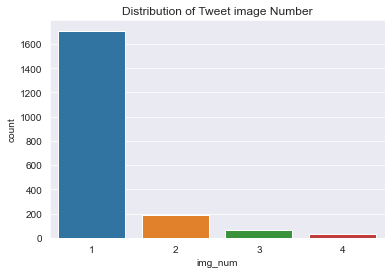

In [81]:
# Reimport matplotlib and reload
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

sns.set_style('darkgrid')
data= master_data['img_num']
sns.countplot(data)
plt.title("Distribution of Tweet image Number");

plt.savefig('img_num')

The graph directly above shows that ober 1600 dog tweets have only 1 one dog image based on the most accurate tweet image available.

### Question 2: Which year received the most dog tweets?

In [82]:
tweets_per_year= master_data.year.value_counts()
tweets_per_year

2016    973
2015    662
2017    357
Name: year, dtype: int64

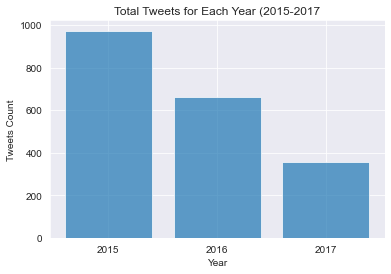

<Figure size 432x288 with 0 Axes>

In [83]:
height= tweets_per_year
location= [1,2,3]
labels= [2015,2016,2017]
plt.title('Total Tweets for Each Year (2015-2017')
plt.xlabel('Year')
plt.ylabel('Tweets Count')
plt.bar(location,height, tick_label=labels, alpha=.7)

plt.show();
plt.savefig('yearly tweet')

#### Question 3: Which month received the most dog Tweets across the years 

In [84]:
# Confirm number of years and months that this data spans across
year= master_data.year.unique()
month= master_data.month.unique()

print(year)
print(month)


[2017 2016 2015]
[ 8  7  6  5  4  3  2  1 12 11 10  9]


In [85]:
# Filter master data by each year
year2015= master_data.query("year==2015")
year2016= master_data.query("year== 2016")
year2017= master_data.query("year== 2017")


In [86]:
year2015.month.value_counts()

12    366
11    296
Name: month, dtype: int64

In [87]:
year2016.month.value_counts()

1     169
3     120
2     111
7      88
6      81
10     65
9      63
8      59
5      57
4      54
12     53
11     53
Name: month, dtype: int64

In [88]:
year2017.month.value_counts()

1    66
2    64
7    49
3    48
6    44
5    43
4    41
8     2
Name: month, dtype: int64

In [89]:
# This code will group each year's data by their month and count
count2015= year2015.groupby('month').count().tweet_id
count2016= year2016.groupby('month').count().tweet_id
count2017= year2017.groupby('month').count().tweet_id

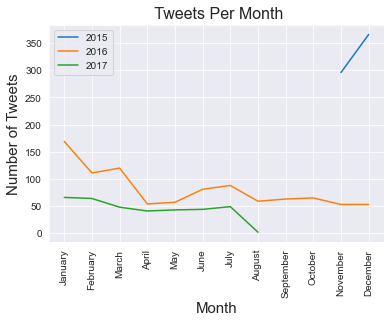

<Figure size 432x288 with 0 Axes>

In [90]:
# create a Line plot showing number of dog Tweets across the three years
sns.set_style('darkgrid')
#plt.title('Distribution of Tweets (2015-2017)', font= {'size':15})
plt.xlabel('Month', font={'size':15})
plt.ylabel('Number of Tweets', font={'size': 15})
plt.title(' Tweets Per Month', font={'size': 16})

# Plot line graph for year 2015
plt.plot(count2015, label='2015')
# Plot line graph for year 2016
plt.plot(count2016, label='2016')
# Plot line graph for year 2017
plt.plot(count2017, label=2017)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], labels=['January', 'February','March', 'April','May', 'June','July', 'August', 'September', 'October', 'November', 'December'],
          rotation= 'vertical')

          
# Show line plot
plt.legend()
plt.show();
plt.savefig('tweet per month')


Looking at the chart displayed (directly) above, we can see that the highest number of dog Tweets recorded by **WeRateDogs** across this 3 years was in the month of November, 2015. 2016 was quite a good year, as it saw a relatively high number of Tweets (169) around January, but declined after to continue with a steady amount of Tweets per month for the rest of the year. The year 2017 recorded dog tweets from the month of January till August, with a sharp decline at August. Overall, the month of **December** saw the highest number of tweets across the 3 years as recorded by **WeRateDogs**

#### Question 4: What is the relationship between `retweet_count` and `favorite_count`?

In [91]:
master_data.corr(method='pearson')

,rating_numerator,rating_denominator,year,month,day,img_num,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted
rating_numerator,1.000000,0.197487,0.025109,-0.014494,-0.024365,-0.000366,NaN,NaN,0.014259,0.010262,0.000158,NaN
rating_denominator,0.197487,1.000000,0.003579,-0.039705,-0.000288,-0.003374,NaN,NaN,-0.020399,-0.027882,-0.003537,NaN
year,0.025109,0.003579,1.000000,-0.719619,-0.102448,0.207552,NaN,NaN,0.348200,0.565999,0.054074,NaN
month,-0.014494,-0.039705,-0.719619,1.000000,0.096062,-0.105409,NaN,NaN,-0.103663,-0.176726,-0.016481,NaN
day,-0.024365,-0.000288,-0.102448,0.096062,1.000000,-0.015712,NaN,NaN,-0.044668,-0.030391,0.008944,NaN
img_num,-0.000366,-0.003374,0.207552,-0.105409,-0.015712,1.000000,NaN,NaN,0.107088,0.136921,0.017591,NaN
truncated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_quote_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.014259,-0.020399,0.348200,-0.103663,-0.044668,0.107088,NaN,NaN,1.000000,0.912938,0.041276,NaN
favorite_count,0.010262,-0.027882,0.565999,-0.176726,-0.030391,0.136921,NaN,NaN,0.912938,1.000000,0.074970,NaN


There is a high correlation of **r^2=0.913** between the `retweet count` and `favorite count`

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


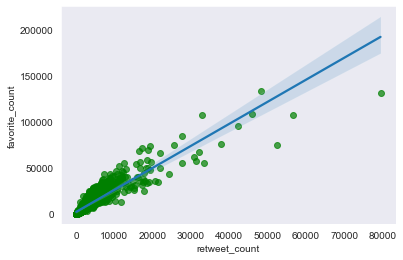

In [92]:
sns.set_style('dark')
sns.regplot(master_data.retweet_count, master_data.favorite_count, scatter_kws = {'color': 'Green', 'alpha':.7});
plt.savefig('correlation')

We can see a positive correlation between the `retweet_count` and `favorite_count`. This implies that generally dog tweets with high `retweet_counts` will have a corresponding high `favorite_count`. Important to note that this relationship **do not imply causation**

#### Question 5: What is the Top10 dog breed with the highest retweet and favorite count?

In [93]:
top10_retweet=master_data.groupby("dog_breed").retweet_count.sum().sort_values(ascending=False).head(10)
top10_retweet

dog_breed
golden_retriever      585873
labrador_retriever    407573
pembroke              292052
chihuahua             251807
samoyed               203446
french_bulldog        156230
cocker_spaniel        145743
chow                  131025
pug                   118682
toy_poodle            115768
Name: retweet_count, dtype: int64

In [94]:
top10_favorite=master_data.groupby("dog_breed").favorite_count.sum().sort_values(ascending=False).head(10)
top10_favorite

dog_breed
golden_retriever      1941007
labrador_retriever    1274526
pembroke              1039484
chihuahua              746604
samoyed                583906
french_bulldog         570921
chow                   446933
cocker_spaniel         407412
pug                    383817
toy_poodle             339068
Name: favorite_count, dtype: int64

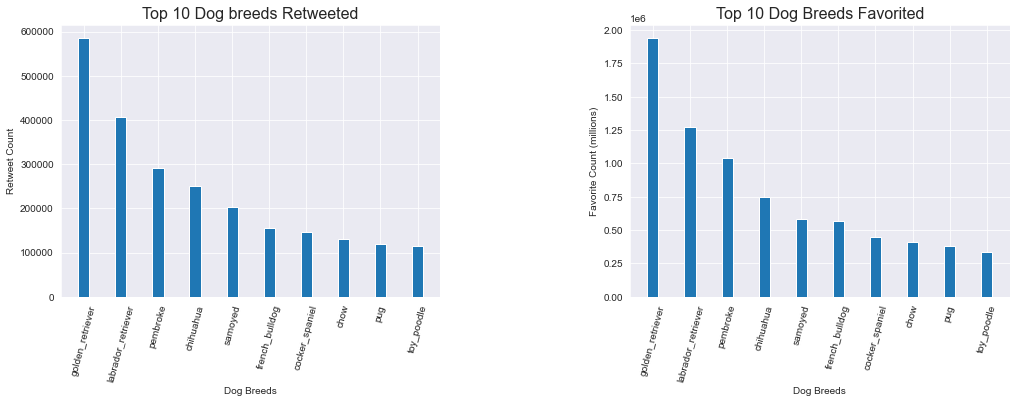

<Figure size 432x288 with 0 Axes>

In [95]:

#Set figure properties
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=(0.5))
sns.set_style('darkgrid')

# Plot graph for retweet count
plt.subplot(1,2,1)
location=[1,2,3,4,5,6,7,8,9,10]
labels=['golden_retriever', 'labrador_retriever', 'pembroke', 
        'chihuahua', 'samoyed', 'french_bulldog','cocker_spaniel','chow', 'pug', 'toy_poodle']
plt.bar(location,top10_retweet, width=0.3, tick_label=labels)
plt.xlabel('Dog Breeds')
plt.ylabel('Retweet Count')
plt.xticks(rotation=75)
plt.title('Top 10 Dog breeds Retweeted', font={'size':16})

# Plot second graph for favourite count
plt.subplot(1,2,2)
location=[1,2,3,4,5,6,7,8,9,10]
plt.bar(location,top10_favorite, width=0.3, tick_label= labels)
plt.xlabel('Dog Breeds')
plt.ylabel('Favorite Count (millions)')
plt.xticks(rotation=75)
plt.title('Top 10 Dog Breeds Favorited', font={'size':16})


plt.show();


From the graphs (directly) above, it can be seen that the same set of dogs have the highest retweet count and favorite count.

The master data used for these visualisations was a product of earlier wrangling efforts, where `archive_clean`, `prediction_images_clean`, and `tweet_json` data were merged into one big clean dataset- `master_data`

<a id='references'></a>
## References

- [Stack Overflow](https://stackoverflow.com/)
- [GeeksforGeeks](https://www.geeksforgeeks.org/python-programming-language/)